# 线性回归实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [4]:
def synthetic_data(w, b , num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) +b
    y+= torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.1225, -0.5640]) 
label: tensor([3.8669])


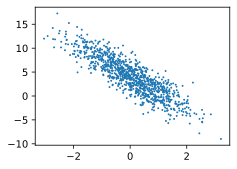

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [23]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        print(batch_indices)
        yield features[batch_indices],labels[batch_indices]




In [24]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([929, 794, 483, 690, 762, 535, 491, 215, 350, 281])
tensor([[ 0.6945,  0.6017],
        [ 0.5038,  0.6055],
        [-0.3450,  0.6179],
        [ 0.1323,  1.9976],
        [ 0.2174, -0.3342],
        [-1.1936,  0.2975],
        [ 0.5847, -0.5224],
        [-0.5315,  0.8097],
        [-1.2081,  0.4321],
        [ 0.1812,  0.1204]]) 
 tensor([[ 3.5469],
        [ 3.1424],
        [ 1.3935],
        [-2.3249],
        [ 5.7649],
        [ 0.7896],
        [ 7.1445],
        [ 0.3723],
        [ 0.3132],
        [ 4.1597]])


In [26]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w,b)

tensor([[-0.0163],
        [ 0.0141]], requires_grad=True) tensor([0.], requires_grad=True)


In [27]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

In [28]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 /2

In [ ]:
def sdg(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param - lr * param / batch_size
            param.grad.zero_()

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

# for epoch in range(num_epochs):
    